In [429]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


# making a DF with geodata of Mississauga 

In [430]:
url = 'https://www.geonames.org/postalcode-search.html?q=mississauga&country=CA&adminCode1=ON'

In [431]:
import requests
results = requests.get(url)
m_geodata = pd.read_html(results.text)

In [432]:
m_geodata

[                                                   0             1
 0  GeoNames Home | Postal Codes | Download / Webs...  search login,
                                                    0   1  \
 0  <!-- google_ad_client = "pub-8752809630410472"... NaN   
 
                                                    2  
 0  PlaceCodeCountryAdmin1Admin2Admin3 1Mississaug...  ,
     Unnamed: 0                                              Place  \
 0          1.0                               Mississauga (Malton)   
 1          NaN                                     43.714/-79.643   
 2          2.0                             Mississauga (Wildwood)   
 3          NaN                                     43.693/-79.607   
 4          3.0                                  Mississauga (YYZ)   
 5          NaN                                      43.69/-79.624   
 6          4.0             Mississauga (Matheson / East Rathwood)   
 7          NaN                                      43.641/-79.63

In [433]:
m_geodata[2]

Unnamed: 0                                              Place  \
0          1.0                               Mississauga (Malton)   
1          NaN                                     43.714/-79.643   
2          2.0                             Mississauga (Wildwood)   
3          NaN                                     43.693/-79.607   
4          3.0                                  Mississauga (YYZ)   
5          NaN                                      43.69/-79.624   
6          4.0             Mississauga (Matheson / East Rathwood)   
7          NaN                                      43.641/-79.63   
8          5.0   Mississauga (West Creditview / Mavis / Erindale)   
9          NaN                                      43.562/-79.65   
10         6.0                     Mississauga (Central Lakeview)   
11         NaN                                     43.584/-79.561   
12         7.0                 Mississauga (Clarkson / Southdown)   
13         NaN                                       43.51/-79.63   
14         8.0                        Mississauga (West Sheridan)   
15         NaN                                     43.527/-79.662   
16         9.0                  Mississauga (Lisgar / Meadowvale)   
17         NaN                                     43.592/-79.761   
18        10.0         Mississauga (West Hurontario / SW Gateway)   
19         NaN                                     43.606/-79.671   
20        11.0                 Mississauga (Cardiff / NE Gateway)   
21         NaN                                      43.68/-79.678   
22        12.0         Mississauga (Courtney Park / East Gateway)   
23         NaN                                     43.668/-79.618   
24        13.0                          Mississauga (East Credit)   
25         NaN                                     43.597/-79.693   
26        14.0    Mississauga (Meadowvale Village / West Gateway)   
27         NaN                                     43.631/-79.715   
28        15.0  Mississauga (East Applewood / East Dixie / NE ...   
29         NaN                                     43.618/-79.579   
30        16.0  Mississauga (West Applewood / West Dixie / NW ...   
31         NaN                                     43.603/-79.593   
32        17.0  Mississauga (West Rathwood / East Hurontario /...   
33         NaN                                     43.619/-79.654   
34        18.0  Mississauga (SW Lakeview / Mineola / East Port...   
35         NaN                                     43.565/-79.585   
36        19.0   Mississauga (Erin Mills / Western Business Park)   
37         NaN                                      43.537/-79.69   
38        20.0  Mississauga (West Port Credit / Lorne Park / E...   
39         NaN                                     43.542/-79.616   
40        21.0  Mississauga (Churchill Meadows / Central Erin ...   
41         NaN                                      43.564/-79.72   
42        22.0  Mississauga (Mississauga Valleys / East Cooksv...   
43         NaN                                     43.588/-79.609   
44        23.0  Mississauga (West Cooksville / Fairview / City...   
45         NaN                                     43.577/-79.631   
46         NaN                                                NaN   

              Code         Country          Admin1          Admin2  \
0              L4T          Canada         Ontario     Mississauga   
1   43.714/-79.643  43.714/-79.643  43.714/-79.643  43.714/-79.643   
2              L4V          Canada         Ontario     Mississauga   
3   43.693/-79.607  43.693/-79.607  43.693/-79.607  43.693/-79.607   
4              L5P          Canada         Ontario     Mississauga   
5    43.69/-79.624   43.69/-79.624   43.69/-79.624   43.69/-79.624   
6              L4W          Canada         Ontario     Mississauga   
7    43.641/-79.63   43.641/-79.63   43.641/-79.63   43.641/-79.63   
8              L5C          Canada         Ontario     Missis

In [434]:
m_geodata = m_geodata[2].drop(['Country','Admin1', 'Admin2','Admin3', 'Unnamed: 0'], axis=1)
m_geodata = m_geodata.dropna()

In [435]:
m_geodata.head()

Place            Code
0    Mississauga (Malton)             L4T
1          43.714/-79.643  43.714/-79.643
2  Mississauga (Wildwood)             L4V
3          43.693/-79.607  43.693/-79.607
4       Mississauga (YYZ)             L5P

In [436]:
m_geodata.columns

Index(['Place', 'Code'], dtype='object')

In [437]:
m_geodata_even = m_geodata.iloc[::2]
m_geodata_odd = m_geodata.iloc[1::2]

In [438]:
m_geodata_even.head()

Place Code
0                              Mississauga (Malton)  L4T
2                            Mississauga (Wildwood)  L4V
4                                 Mississauga (YYZ)  L5P
6            Mississauga (Matheson / East Rathwood)  L4W
8  Mississauga (West Creditview / Mavis / Erindale)  L5C

In [439]:
for row_pl_co, row_lat_long in zip(m_geodata_even.iterrows(), m_geodata_odd.iterrows()):
    print(row_pl_co[1][0].split('Mississauga (')[1].strip().strip('()'))
#     print(row_pl_co[1][0].split('Mississauga')[1].strip().strip('()'))
#     print([row_pl_co[1][0], row_pl_co[1][1]] + row_lat_long[1][0].split('/'))
#     print(row_pl_co[1][0], row_pl_co[1][1])
#     print(row_lat_long[1][0].split('/'))
    

Malton
Wildwood
YYZ
Matheson / East Rathwood
West Creditview / Mavis / Erindale
Central Lakeview
Clarkson / Southdown
West Sheridan
Lisgar / Meadowvale
West Hurontario / SW Gateway
Cardiff / NE Gateway
Courtney Park / East Gateway
East Credit
Meadowvale Village / West Gateway
East Applewood / East Dixie / NE Lakeview
West Applewood / West Dixie / NW Lakeview
West Rathwood / East Hurontario / SE Gateway
SW Lakeview / Mineola / East Port Credit
Erin Mills / Western Business Park
West Port Credit / Lorne Park / East Sheridan
Churchill Meadows / Central Erin Mills / South Streetsville
Mississauga Valleys / East Cooksville
West Cooksville / Fairview / City Centre / East Creditview


In [440]:
df = pd.DataFrame(
    [row_pl_co[1][0].split('Mississauga (')[1].strip().strip('()'), row_pl_co[1][1]]+row_lat_long[1][0].split('/') for row_pl_co, row_lat_long in zip(m_geodata_even.iterrows(), m_geodata_odd.iterrows())
)
df.columns = columns=['Neighbourhood','postal_code','Latitude','Longitude']

In [441]:
df

Neighbourhood postal_code Latitude  \
0                                              Malton         L4T   43.714   
1                                            Wildwood         L4V   43.693   
2                                                 YYZ         L5P    43.69   
3                            Matheson / East Rathwood         L4W   43.641   
4                  West Creditview / Mavis / Erindale         L5C   43.562   
5                                    Central Lakeview         L5E   43.584   
6                                Clarkson / Southdown         L5J    43.51   
7                                       West Sheridan         L5K   43.527   
8                                 Lisgar / Meadowvale         L5N   43.592   
9                        West Hurontario / SW Gateway         L5R   43.606   
10                               Cardiff / NE Gateway         L5S    43.68   
11                       Courtney Park / East Gateway         L5T   43.668   
12                                        East Credit         L5V   43.597   
13                  Meadowvale Village / West Gateway         L5W   43.631   
14          East Applewood / East Dixie / NE Lakeview         L4X   43.618   
15          West Applewood / West Dixie / NW Lakeview         L4Y   43.603   
16       West Rathwood / East Hurontario / SE Gateway         L4Z   43.619   
17           SW Lakeview / Mineola / East Port Credit         L5G   43.565   
18                 Erin Mills / Western Business Park         L5L   43.537   
19      West Port Credit / Lorne Park / East Sheridan         L5H   43.542   
20  Churchill Meadows / Central Erin Mills / South...         L5M   43.564   
21              Mississauga Valleys / East Cooksville         L5A   43.588   
22  West Cooksville / Fairview / City Centre / Eas...         L5B   43.577   

   Longitude  
0    -79.643  
1    -79.607  
2    -79.624  
3     -79.63  
4     -79.65  
5    -79.561  
6     -79.63  
7    -79.662  
8    -79.761  
9    -79.671  
10   -79.678  
11   -79.618  
12   -79.693  
13   -79.715  
14   -79.579  
15   -79.593  
16   -79.654  
17   -79.585  
18    -79.69  
19   -79.616  
20    -79.72  
21   -79.609  
22   -79.631

In [442]:
address = 'Mississauga, ON'

geolocator = Nominatim(user_agent="m_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mississauga are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mississauga are 43.590338, -79.645729.


In [ ]:
# create map of Mississauga using latitude and longitude values
map_m = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
#for lat, lng in zip(df['Latitude'], df['Longitude']):
    #label = '{}, {}'.format(neighbourhood, postal_code)
    #label = folium.Popup(label, parse_html=True)
    #folium.CircleMarker(
        #[lat, lng],
        #radius=5,
        #popup=label,
        #color='blue',
        #fill=True,
        #fill_color='#3186cc',
        #fill_opacity=0.7,
        #parse_html=False).add_to(map_m) 
    
map_m

# Foursquare API 

In [443]:
CLIENT_ID = 'U2GO2U2DJXNDZ1PHXJ3RDECH4JGTLO3CNY2EVN15504F4N4M' # your Foursquare ID
CLIENT_SECRET = 'AH1N0CBESG5HQB3Q2YFDADK3RTUH1H0G5HG1OHV431BIM1KG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: U2GO2U2DJXNDZ1PHXJ3RDECH4JGTLO3CNY2EVN15504F4N4M
CLIENT_SECRET:AH1N0CBESG5HQB3Q2YFDADK3RTUH1H0G5HG1OHV431BIM1KG


# Explore endpoint with search_query

In [683]:
def getVenuesExplore(neighs, latitudes, longitudes, query):
    
    venues_list=[]
    for neigh, lat, lng in zip(neighs, latitudes, longitudes):
            
        # create the API request URL
        url= 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, query, 5000, 150)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            neigh, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    
    return(nearby_venues)

In [684]:
resto_by_neighs_df = getVenuesExplore(neighs=df['Neighbourhood'], 
                                      latitudes=df['Latitude'], 
                                      longitudes=df['Longitude'],
                                     query='Food')

In [685]:
resto_by_neighs_df.drop_duplicates(subset=['Venue','Venue Latitude', 'Venue Longitude', 'Venue Category'], 
                                   keep = 'first', inplace = True)

In [677]:
resto_by_neighs_df.shape

(789, 7)

In [686]:
resto_by_neighs_df

Neighborhood Neighborhood Latitude  \
0                                                Malton                43.714   
1                                                Malton                43.714   
2                                                Malton                43.714   
3                                                Malton                43.714   
4                                                Malton                43.714   
5                                                Malton                43.714   
6                                                Malton                43.714   
7                                                Malton                43.714   
8                                                Malton                43.714   
9                                                Malton                43.714   
10                                               Malton                43.714   
11                                               Malton                43.714   
12                                               Malton                43.714   
13                                               Malton                43.714   
14                                               Malton                43.714   
15                                               Malton                43.714   
16                                               Malton                43.714   
17                                               Malton                43.714   
18                                               Malton                43.714   
19                                               Malton                43.714   
20                                               Malton                43.714   
21                                               Malton                43.714   
22                                               Malton                43.714   
23                                               Malton                43.714   
24                                               Malton                43.714   
25                                               Malton                43.714   
26                                               Malton                43.714   
27                                               Malton                43.714   
28                                               Malton                43.714   
29                                               Malton                43.714   
30                                               Malton                43.714   
31                                               Malton                43.714   
32                                               Malton                43.714   
33                                               Malton                43.714   
34                                               Malton                43.714   
35                                               Malton                43.714   
36                                               Malton                43.714   
37                                               Malton                43.714   
38                                               Malton                43.714   
39                                               Malton                43.714   
40                                               Malton                43.714   
41                                               Malton                43.714   
42                                               Malton                43.714   
43                                               Malton                43.714   
44                                               Malton                43.714   
45                                               Malton                43.714   
46                                               Malton                43.714   
47                                               Malton                43.714   
48                                               Malton                43.

In [673]:
resto_by_neighs_df['Venue Category']

0                   Indian Restaurant
1                   Afghan Restaurant
2                   Indian Restaurant
3                  Chinese Restaurant
4                Caribbean Restaurant
5                Caribbean Restaurant
6                          Steakhouse
7                               Diner
8                   Indian Restaurant
9                   Indian Restaurant
10                       Burger Joint
11                         Steakhouse
12                         Restaurant
13               Caribbean Restaurant
14                       Burger Joint
15                 Chinese Restaurant
16                Fried Chicken Joint
17                 Chinese Restaurant
18                        Pizza Place
19                         Steakhouse
20                American Restaurant
21               Fast Food Restaurant
22                     Sandwich Place
23                     Sandwich Place
24                  Indian Restaurant
25               Fast Food Restaurant
26          

In [682]:
resto_by_neighs_df[['Neighborhood']]

Neighborhood
0          Malton
1          Malton
2          Malton
3          Malton
4          Malton
5          Malton
6          Malton
7          Malton
8          Malton
9          Malton
10         Malton
11         Malton
12         Malton
13         Malton
14         Malton
15         Malton
16         Malton
17         Malton
18         Malton
19         Malton
20         Malton
21         Malton
22         Malton
23         Malton
24         Malton
25         Malton
26         Malton
27         Malton
28         Malton
29         Malton
30         Malton
31         Malton
32         Malton
33         Malton
34         Malton
35         Malton
36         Malton
37         Malton
38         Malton
39         Malton
40         Malton
41         Malton
42         Malton
43         Malton
44         Malton
45         Malton
46         Malton
47         Malton
48         Malton
49         Malton
50         Malton
51         Malton
52         Malton
53         Malton
54         Malton
55         Malton
56         Malton
57         Malton
58         Malton
59         Malton
60         Malton
61         Malton
62         Malton
63         Malton
64         Malton
65         Malton
66         Malton
67         Malton
68         Malton
69         Malton
70         Malton
71         Malton
72         Malton
73         Malton
74         Malton
75         Malton
76         Malton
77         Malton
78         Malton
79         Malton
80         Malton
81         Malton
82         Malton
83         Malton
84         Malton
85         Malton
86         Malton
87         Malton
88         Malton
89         Malton
90         Malton
91         Malton
92         Malton
93         Malton
94         Malton
95         Malton
96         Malton
97         Malton
98         Malton
99         Malton
102        Malton
103        Malton
105        Malton
107        Malton
108        Malton
111        Malton
113        Malton
116        Malton
117        Malton
122        Malton
123        Malton
124        Malton
125        Malton
126        Malton
128        Malton
130        Malton
131        Malton
133        Malton
134        Malton
137        Malton
138        Malton
146        Malton
147        Malton
150        Malton
151        Malton
152        Malton
153        Malton
154        Malton
156        Malton
158        Malton
170        Malton
172        Malton
175        Malton
177        Malton
181        Malton
201        Malton
207        Malton
209        Malton
211        Malton
217        Malton
222        Malton
223        Malton
227        Malton
245        Malton
250        Malton
251        Malton
254        Malton
263        Malton
265        Malton
266        Malton
267        Malton
269        Malton
270        Malton
271        Malton
272        Malton
273        Malton
274        Malton
275        Malton
276        Malton
277        Malton
278        Malton
279        Malton
280        Malton
282        Malton
283        Malton
284        Malton
285        Malton
286        Malton
287        Malton
288        Malton
289        Malton
290        Malton
291        Malton
292        Malton
294        Malton
295        Malton
296        Malton
297        Malton
298        Malton
300        Malton
301        Malton
302        Malton
303        Malton
305        Malton
307        Malton
308        Malton
309        Malton
310        Malton
311        Malton
312        Malton
313        Malton
314        Malton
316        Malton
317        Malton
318        Malton
319        Malton
320        Malton
321        Malton
322        Malton
323        Malton
326        Malton
328        Malton
329        Malton
330        Malton
332        Malton
333        Malton
334        Malton
335        Malton
336        Malton
337        Malton
338        Malton
339        Malton
341        Malton
342        Malton
343        Malton
344        Malton
345        Malton
346        Malton
347        Malton
348        Malton
349        Malton
350      

In [564]:
#NUmber of unique restarants types in Mississauga
len(resto_by_neighs_df['Venue Category'].unique())

74

In [689]:
#Number of Restarants per Neighbourhood in Mississauga
resto_by_neighs_df['Neighborhood'].value_counts()


Malton                                                         100
West Creditview / Mavis / Erindale                              95
Central Lakeview                                                90
Matheson / East Rathwood                                        84
Lisgar / Meadowvale                                             83
Clarkson / Southdown                                            74
Wildwood                                                        35
Cardiff / NE Gateway                                            34
Meadowvale Village / West Gateway                               32
West Sheridan                                                   31
YYZ                                                             28
East Applewood / East Dixie / NE Lakeview                       24
West Hurontario / SW Gateway                                    19
West Port Credit / Lorne Park / East Sheridan                   18
Erin Mills / Western Business Park                            

In [693]:
resto_by_neighs_df.dtypes

Neighborhood               object
Neighborhood Latitude      object
Neighborhood Longitude     object
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
dtype: object

In [648]:
 resto_by_neighs_df.groupby(['Venue Category']).count()

Neighborhood  Neighborhood Latitude  \
Venue Category                                                       
Afghan Restaurant                         5                      5   
African Restaurant                        1                      1   
American Restaurant                      17                     17   
Asian Restaurant                         23                     23   
BBQ Joint                                 8                      8   
Bagel Shop                                1                      1   
Bakery                                   22                     22   
Bistro                                    2                      2   
Breakfast Spot                           22                     22   
Burger Joint                             25                     25   
Burrito Place                             9                      9   
Café                                     18                     18   
Cantonese Restaurant                      2                      2   
Caribbean Restaurant                      8                      8   
Chinese Restaurant                       29                     29   
Comfort Food Restaurant                   1                      1   
Deli / Bodega                             5                      5   
Dim Sum Restaurant                        1                      1   
Diner                                     7                      7   
Donut Shop                                2                      2   
Eastern European Restaurant               2                      2   
Falafel Restaurant                        5                      5   
Fast Food Restaurant                     44                     44   
Filipino Restaurant                       3                      3   
Fish & Chips Shop                         3                      3   
Food                                      1                      1   
Food Court                                5                      5   
Food Truck                                2                      2   
Fried Chicken Joint                      10                     10   
Gastropub                                 3                      3   
German Restaurant                         1                      1   
Greek Restaurant                         12                     12   
Halal Restaurant                          1                      1   
Hotpot Restaurant                         1                      1   
Indian Chinese Restaurant                 1                      1   
Indian Restaurant                        50                     50   
Iraqi Restaurant                          1                      1   
Irish Pub                                 3                      3   
Italian Restaurant                       34                     34   
Japanese Restaurant                      18                     18   
Kebab Restaurant                          1                      1   
Korean Restaurant                         8                      8   
Mediterranean Restaurant                 11                     11   
Mexican Restaurant                       19                     19   
Middle Eastern Restaurant                23                     23   
Moroccan Restaurant                       1                      1   
New American Restaurant                   2                      2   
Noodle House                              3                      3   
North Indian Restaurant                   1                      1   
Pakistani Restaurant                      3                      3   
Pizza Place                              59                     59   
Portuguese Restaurant                     5                      5   
Poutine Place                             2                      2   
Ramen Restaurant                          1                      1   
Restaurant                               65                     65   
Salad Place                              

In [691]:
resto_by_neighs_df['Venue Category'].value_counts()

Sandwich Place                   73
Pizza Place                      64
Restaurant                       62
Indian Restaurant                51
Fast Food Restaurant             46
Italian Restaurant               36
Chinese Restaurant               30
Burger Joint                     27
Breakfast Spot                   24
Middle Eastern Restaurant        23
Asian Restaurant                 22
Sushi Restaurant                 22
Bakery                           22
Café                             20
Mexican Restaurant               19
American Restaurant              17
Japanese Restaurant              17
Vietnamese Restaurant            16
Wings Joint                      14
Thai Restaurant                  13
Greek Restaurant                 12
Mediterranean Restaurant         11
Fried Chicken Joint              10
Steakhouse                       10
Burrito Place                     9
Seafood Restaurant                9
Korean Restaurant                 8
Caribbean Restaurant        

In [603]:
resto_types_df = pd.DataFrame(columns=['Venue Category', 'count'])

In [608]:
resto_types_df =  resto_by_neighs_df.groupby(['Venue Category']).count()

In [621]:
resto_types_df.drop(columns=['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'], inplace=True)

KeyError: "['Neighborhood Latitude' 'Neighborhood Longitude' 'Venue' 'Venue Latitude'\n 'Venue Longitude'] not found in axis"

In [619]:
resto_types_df.index

Index(['Afghan Restaurant', 'African Restaurant', 'American Restaurant',
       'Asian Restaurant', 'BBQ Joint', 'Bagel Shop', 'Bakery', 'Bistro',
       'Breakfast Spot', 'Burger Joint', 'Burrito Place', 'Café',
       'Cantonese Restaurant', 'Caribbean Restaurant', 'Chinese Restaurant',
       'Comfort Food Restaurant', 'Deli / Bodega', 'Dim Sum Restaurant',
       'Diner', 'Donut Shop', 'Eastern European Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Filipino Restaurant',
       'Fish & Chips Shop', 'Food', 'Food Court', 'Food Truck',
       'Fried Chicken Joint', 'Gastropub', 'German Restaurant',
       'Greek Restaurant', 'Halal Restaurant', 'Hotpot Restaurant',
       'Indian Chinese Restaurant', 'Indian Restaurant', 'Iraqi Restaurant',
       'Irish Pub', 'Italian Restaurant', 'Japanese Restaurant',
       'Kebab Restaurant', 'Korean Restaurant', 'Mediterranean Restaurant',
       'Mexican Restaurant', 'Middle Eastern Restaurant',
       'Moroccan Restaurant'

In [623]:
resto_types_df =resto_types_df.reset_index()

In [632]:
resto_types_df.rename(columns={'Neighborhood':'count'}, inplace=True)

In [634]:
resto_types_df.sort_values(by=['count'], ascending=False)

Venue Category  count
56                 Sandwich Place     74
54                     Restaurant     65
50                    Pizza Place     59
35              Indian Restaurant     50
22           Fast Food Restaurant     44
38             Italian Restaurant     34
14             Chinese Restaurant     29
9                    Burger Joint     25
44      Middle Eastern Restaurant     23
3                Asian Restaurant     23
61               Sushi Restaurant     23
6                          Bakery     22
8                  Breakfast Spot     22
43             Mexican Restaurant     19
39            Japanese Restaurant     18
11                           Café     18
2             American Restaurant     17
71          Vietnamese Restaurant     16
72                    Wings Joint     14
67                Thai Restaurant     13
31               Greek Restaurant     12
42       Mediterranean Restaurant     11
60                     Steakhouse     10
57             Seafood Restaurant     10
28            Fried Chicken Joint     10
10                  Burrito Place      9
13           Caribbean Restaurant      8
41              Korean Restaurant      8
4                       BBQ Joint      8
18                          Diner      7
26                     Food Court      5
51          Portuguese Restaurant      5
21             Falafel Restaurant      5
16                  Deli / Bodega      5
0               Afghan Restaurant      5
47                   Noodle House      3
49           Pakistani Restaurant      3
37                      Irish Pub      3
23            Filipino Restaurant      3
24              Fish & Chips Shop      3
29                      Gastropub      3
20    Eastern European Restaurant      2
46        New American Restaurant      2
19                     Donut Shop      2
55                    Salad Place      2
52                  Poutine Place      2
27                     Food Truck      2
12           Cantonese Restaurant      2
69             Turkish Restaurant      2
7                          Bistro      2
66               Tapas Restaurant      1
17             Dim Sum Restaurant      1
65           Taiwanese Restaurant      1
68                     Truck Stop      1
64                     Taco Place      1
70  Vegetarian / Vegan Restaurant      1
63            Szechuan Restaurant      1
5                      Bagel Shop      1
62               Swiss Restaurant      1
15        Comfort Food Restaurant      1
1              African Restaurant      1
59      South American Restaurant      1
58                    Snack Place      1
36               Iraqi Restaurant      1
53               Ramen Restaurant      1
25                           Food      1
48        North Indian Restaurant      1
45            Moroccan Restaurant      1
30              German Restaurant      1
32               Halal Restaurant      1
33              Hotpot Restaurant      1
34      Indian Chinese Restaurant      1
40               Kebab Restaurant      1
73              Yemeni Restaurant      1

In [695]:
resto_types_df.dtypes

Venue Category    object
count              int64
dtype: object

Text(0.5, 1.0, 'horsepower bins')

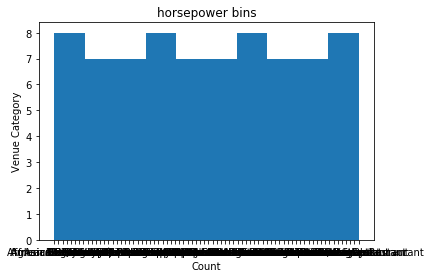

In [701]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(resto_types_df["Venue Category"])

# set x/y labels and plot title
plt.pyplot.xlabel("Count")
plt.pyplot.ylabel("Venue Category")
plt.pyplot.title("horsepower bins")

In [710]:
resto_by_neighs_df[['Venue', 'Venue Category']].sort_values(by=['Venue Category'])

Venue  \
312                          Watan Kabob (Afghan Grill)   
425                                         Afgan Kebob   
341                                        Naan & Kabob   
67                              Al- Meezans Spicy Grill   
1                                         Bamiyan Kabob   
177                                    Hamdi Restaurant   
65                               Bliss Restaurant & Bar   
791                               Moxie's Classic Grill   
75                                  Willows Dining Room   
823                                             Cagneys   
785                                               Saucy   
778                                 Union Social Eatery   
674                                            Lonestar   
639                            Jack Astor's Bar & Grill   
551                               Muddy Duck Restaurant   
40                                Lone Star Texas Grill   
550                            Jack Astor's Bar & Grill   
269                            Jack Astor's Bar & Grill   
20                                Moxie's Classic Grill   
302                                Culinaria Restaurant   
1652                                       Taam Cuisine   
280                                             M0xie's   
276                                             Hooters   
806                                           Ming Room   
819                             Tangerine Asian Cuisine   
289                                     House of Pepper   
770                           The Chase Convience Store   
877                                         Hakka Magic   
394                         Lion City Restaurant 獅城南洋餐廳   
396                                          Tremendous   
111                                        Golden Asian   
122                                    Faley Restaurant   
997                                         Wok Of Fame   
410                                      Owl Of Minerva   
303                                       Royal Jasmine   
593                                       Celadon House   
1043                                         Dixie Park   
439                                 Chili Chicken House   
1044                               Tropicana Restaurant   
1302                                           Spoonful   
27                                          Hakka No. 1   
450                                           Basil Box   
444          Quiapo Quiapo Filipino Restaurant & Bakery   
1669                              Axia Restaurant & Bar   
803                                        Hakka Legend   
1274                                  RD's Southern BBQ   
766                             Mitchell's Pump & Patio   
1799                                          Fired Up!   
470                                         Mario's BBQ   
490                          Holy Smokez BBQ Sandwiches   
53                                         Lykn Chicken   
908                                        Cafe De Khan   
1808                                    The Bagel House   
336                             Irene's Celebrity Cakes   
413                                        Panera Bread   
391                                        Lazar Bakery   
301                                Nova Pastry & Bakery   
507                                 Danish Pastry House   
313                                          COBS Bread   
740                                    Akko Bakery 雅閣餅屋   
618                                        Panera Bread   
117                                     Tre Rose Bakery   
416                     La Novita Bakery & Delicatessen   
585                      Truscott Italian Bakery & Deli   
460                                        Panera Bread   
528                                       Tatsu's Bread   
776                                          COBS Bread   
449                                   

In [713]:
(resto_by_neighs_df["Venue"]).dtypes

dtype('O')

In [755]:
ethnic = ['Italian', 'Taam','Lazar', 'Danish', 'Akko', 'Truscott Italian', 'Tatsu','Baguette','Dimpflmeier', "Indian",
         'Afghan', 'Chinese', 'Caribbean', 'Greek', 'Vietnamese', 'Thai', 'Mexican', 
          'Middle Eastern', 'Sushi', 'Japanese', 'German', 'Tapas', 'Filipino', 'Moroccan', 
         'Asian', 'Falafel', 'Korean', 'Hotpot', 'Noodle','Pakistani', 'Mediterranean',
         'Ming', 'Molisana', 'Pho', 'Portuguese', 'Polish', 'Kabob', 'Shawarma','Lisboa',
         'Brazil', 'Turkish', 'Souvlaki', 'Archeo Focacceria', 'Panoplis', 'Porta Via',
         'Mrakovic', 'Eastern European', 'Tre Rose Bakery', 'Halal', 'African', 'Dim Sum', 'Ristorante']
# resto_by_neighs_df[["Venue"]].isin(ethnic)

In [730]:
resto_by_neighs_df["Venue"].str.contains(pat="Bakery",regex=True)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47       True
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [783]:
middle_eastern = ['Afghan', 'Middle Eastern','Mediterranean', 'Turkish', 'Halal', 'Kabob', 'Falafel', 'Shawarma', 'Moroccan' ]
east_european = ['German', 'Italian', 'Greek', 'Polish', 'Portuguese', 
            'Molisana', 'Souvlaki', 'Lazar', 'Danish', 'Lisboa', 'Ristorante', 
            'Baguette','Dimpflmeier', 'Danish', 'Eastern European', 'Panoplis', 
            'Archeo Focacceria', 'Souvlaki', 'Truscott Italian', 'Porta Via', 'Tre Rose Bakery']
south_asian = ['Indian', 'Pakistani', 'North Indian' ]

east_asian = ['Chinese', 'Noodle', 'Asian', 'Korean', 'Sushi', 
              'Tapas', 'Hotpot', 'Dim Sum', 'Thai', 'Vietnamese',
             'Japanese', 'Cantonese', 'Tatsu', 'American', 'Akko', 'Ming']

african = ['Caribbean', 'African']

other = ['Brazil', 'Mexican']

In [849]:
resto_by_neighs_df[~(resto_by_neighs_df["Venue"].str.contains('|'.join(ethnic)) | 
                   resto_by_neighs_df["Venue Category"].str.contains('|'.join(ethnic)))].shape

(437, 7)

In [850]:
ethnic_restos = resto_by_neighs_df[resto_by_neighs_df["Venue"].str.contains('|'.join(ethnic)) | 
                   resto_by_neighs_df["Venue Category"].str.contains('|'.join(ethnic))]

ethnic_restos.shape

(352, 7)

In [763]:
ethnic_restos['Venue Category'].value_counts()

Indian Restaurant              51
Italian Restaurant             36
Chinese Restaurant             30
Middle Eastern Restaurant      23
Asian Restaurant               22
Sushi Restaurant               22
Mexican Restaurant             19
Japanese Restaurant            17
Vietnamese Restaurant          16
Thai Restaurant                13
Greek Restaurant               12
Bakery                         12
Mediterranean Restaurant       11
Caribbean Restaurant            8
Korean Restaurant               8
Restaurant                      6
Afghan Restaurant               5
Portuguese Restaurant           5
Falafel Restaurant              5
Filipino Restaurant             3
Pakistani Restaurant            3
Noodle House                    3
Eastern European Restaurant     2
Sandwich Place                  2
Turkish Restaurant              2
Cantonese Restaurant            2
Fast Food Restaurant            1
Moroccan Restaurant             1
Tapas Restaurant                1
German Restaur

In [851]:
resto_by_neighs_df.shape

(789, 7)

In [852]:
non_ethnic = resto_by_neighs_df[~(resto_by_neighs_df["Venue"].str.contains('|'.join(ethnic)) | 
                   resto_by_neighs_df["Venue Category"].str.contains('|'.join(ethnic)))]

non_ethnic

Neighborhood Neighborhood Latitude  \
6                                                Malton                43.714   
7                                                Malton                43.714   
10                                               Malton                43.714   
11                                               Malton                43.714   
12                                               Malton                43.714   
14                                               Malton                43.714   
16                                               Malton                43.714   
18                                               Malton                43.714   
19                                               Malton                43.714   
20                                               Malton                43.714   
21                                               Malton                43.714   
22                                               Malton                43.714   
23                                               Malton                43.714   
25                                               Malton                43.714   
26                                               Malton                43.714   
28                                               Malton                43.714   
31                                               Malton                43.714   
32                                               Malton                43.714   
33                                               Malton                43.714   
36                                               Malton                43.714   
37                                               Malton                43.714   
39                                               Malton                43.714   
40                                               Malton                43.714   
43                                               Malton                43.714   
44                                               Malton                43.714   
46                                               Malton                43.714   
47                                               Malton                43.714   
48                                               Malton                43.714   
49                                               Malton                43.714   
51                                               Malton                43.714   
53                                               Malton                43.714   
54                                               Malton                43.714   
55                                               Malton                43.714   
57                                               Malton                43.714   
58                                               Malton                43.714   
60                                               Malton                43.714   
61                                               Malton                43.714   
63                                               Malton                43.714   
64                                               Malton                43.714   
65                                               Malton                43.714   
66                                               Malton                43.714   
68                                               Malton                43.714   
70                                               Malton                43.714   
72                                               Malton                43.714   
73                                               Malton                43.714   
74                                               Malton                43.714   
75                                               Malton                43.714   
76                                               Malton                43.714   
77                                               Malton                43.

In [773]:
middle_eastern_restos = ethnic_restos[ethnic_restos["Venue"].str.contains('|'.join(middle_eastern)) | 
                   ethnic_restos["Venue Category"].str.contains('|'.join(middle_eastern))]

middle_eastern_restos.shape

(48, 7)

In [784]:
east_euporpean_restos = ethnic_restos[ethnic_restos["Venue"].str.contains('|'.join(east_european)) | 
                   ethnic_restos["Venue Category"].str.contains('|'.join(east_european))]

east_euporpean_restos.shape

(69, 7)

In [774]:
south_asian_restos = ethnic_restos[ethnic_restos["Venue"].str.contains('|'.join(south_asian)) | 
                   ethnic_restos["Venue Category"].str.contains('|'.join(south_asian))]

south_asian_restos.shape

(56, 7)

In [777]:
east_asian_restos = ethnic_restos[ethnic_restos["Venue"].str.contains('|'.join(east_asian)) | 
                   ethnic_restos["Venue Category"].str.contains('|'.join(east_asian))]

east_asian_restos.shape

(148, 7)

In [780]:
african_restos = ethnic_restos[ethnic_restos["Venue"].str.contains('|'.join(african)) | 
                   ethnic_restos["Venue Category"].str.contains('|'.join(african))]

african_restos.shape

(9, 7)

In [782]:
other_restos = ethnic_restos[ethnic_restos["Venue"].str.contains('|'.join(other)) | 
                   ethnic_restos["Venue Category"].str.contains('|'.join(other))]

other_restos.shape

(22, 7)

# Population by region

In [830]:
path='/Users/nirugidla/Downloads/CensusProfile2016-ProfilRecensement2016-20200623054135.csv'
popu_df = pd.read_csv(path, encoding = "ISO-8859-1")
popu_df

Unnamed: 0  \
Topic                                              Characteristics                                    Note Total                               Flag_Total       Male   
NaN                                                NaN                                                NaN  Counts (unless otherwise specified) NaN               NaN   
Population and dwellings                           Population; 2016                                   1      721599                            NaN               NaN   
                                                   Population; 2011                                   1      713443                            NaN               NaN   
                                                   Population percentage change; 2011 to 2016         NaN        1.1                           NaN               NaN   
                                                   Total private dwellings                            2      248469                            NaN               NaN   
                                                   Private dwellings occupied by usual residents      3      240913                            NaN               NaN   
                                                   Population density per square kilometre            NaN   2467.6                             NaN               NaN   
                                                   Land area in square kilometres                     NaN      292.43                          NaN               NaN   
Age characteristics                                Total - Age groups and average age of the popul... 4      721600                            NaN            351930   
                                                     0 to 14 years                                    NaN    120925                            NaN             61900   
                                                       0 to 4 years                                   NaN     35460                            NaN             17880   
                                                       5 to 9 years                                   NaN     41485                            NaN             21220   
                                                       10 to 14 years                                 NaN     43980                            NaN             22805   
                                                     15 to 64 years                                   NaN    498890                            NaN            243785   
                                                       15 to 19 years                                 NaN     49205                            NaN             25670   
                                                       20 to 24 years                                 NaN     53645                            NaN             27795   
                                                       25 to 29 years                                 NaN     47170                            NaN             23710   
                                                       30 to 34 years                                 NaN     44695                            NaN             21520   
                                                       35 to 39 years                                 NaN     45050                            NaN             20660   
                                                       40 to 44 years                                 NaN     48505                            NaN             22445   
                                                       45 to 49 years                                 NaN     54770                            NaN             25905   
                                                       50 to 54 years                                 NaN     59925                            NaN             29200   
                                                       55 to 59 years                                 NaN     53435       

In [832]:
popu_df.drop(columns = ["Unnamed: 1", "Unnamed: 7", "Canada [Country]",
                        "Mississauga, City [Census subdivision], Ontario",
                        "Unnamed: 5", "Unnamed: 0", "Unnamed: 2", 
                        "Unnamed: 6", "Unnamed: 8" ], inplace=True)

In [833]:
popu_df.reset_index(inplace=True)

In [834]:
popu_df.drop(columns='level_4', inplace=True)

In [835]:
popu_df.rename(columns={"level_0":"Topic", "level_1":"Characteristics",'level_2':"Note", 'level_3':" Mississauga Total", 'Unnamed: 4':" Canada Total"}, inplace=True)

In [836]:
popu_df.drop(index=[0,1], inplace=True)

In [837]:
popu_df

Topic  \
2                              Population and dwellings   
3                              Population and dwellings   
4                              Population and dwellings   
5                              Population and dwellings   
6                              Population and dwellings   
7                              Population and dwellings   
8                              Population and dwellings   
9                                   Age characteristics   
10                                  Age characteristics   
11                                  Age characteristics   
12                                  Age characteristics   
13                                  Age characteristics   
14                                  Age characteristics   
15                                  Age characteristics   
16                                  Age characteristics   
17                                  Age characteristics   
18                                  Age characteristics   
19                                  Age characteristics   
20                                  Age characteristics   
21                                  Age characteristics   
22                                  Age characteristics   
23                                  Age characteristics   
24                                  Age characteristics   
25                                  Age characteristics   
26                                  Age characteristics   
27                                  Age characteristics   
28                                  Age characteristics   
29                                  Age characteristics   
30                                  Age characteristics   
31                                  Age characteristics   
32                                  Age characteristics   
33                                  Age characteristics   
34                                  Age characteristics   
35                                  Age characteristics   
36                                  Age characteristics   
37                                  Age characteristics   
38                                  Age characteristics   
39                                  Age characteristics   
40                                  Age characteristics   
41                                  Age characteristics   
42               Household and dwelling characteristics   
43               Household and dwelling characteristics   
44               Household and dwelling characteristics   
45               Household and dwelling characteristics   
46               Household and dwelling characteristics   
47               Household and dwelling characteristics   
48               Household and dwelling characteristics   
49               Household and dwelling characteristics   
50               Household and dwelling characteristics   
51               Household and dwelling characteristics   
52               Household and dwelling characteristics   
53               Household and dwelling characteristics   
54               Household and dwelling characteristics   
55               Household and dwelling characteristics   
56               Household and dwelling characteristics   
57               Household and dwelling characteristics   
58               Household and dwelling characteristics   
59               Household and dwelling characteristics   
60                                       Marital status   
61                                       Marital status   
62                                       Marital status   
63                                       Marital status   
64                                       Marital status   
65                                       Marital status   
66                                       Marital status   
67                                       Marital status   
68                                       Marital status   
69                               Famil

In [845]:
ethnic_origin_popu = popu_df[['Topic', 'Characteristics', ' Mississauga Total']][popu_df['Topic']=='Ethnic origin population']

In [846]:
ethnic_origin_popu[popu_df['Topic']

Topic  \
1339  Ethnic origin population   
1340  Ethnic origin population   
1341  Ethnic origin population   
1342  Ethnic origin population   
1343  Ethnic origin population   
1344  Ethnic origin population   
1345  Ethnic origin population   
1346  Ethnic origin population   
1347  Ethnic origin population   
1348  Ethnic origin population   
1349  Ethnic origin population   
1350  Ethnic origin population   
1351  Ethnic origin population   
1352  Ethnic origin population   
1353  Ethnic origin population   
1354  Ethnic origin population   
1355  Ethnic origin population   
1356  Ethnic origin population   
1357  Ethnic origin population   
1358  Ethnic origin population   
1359  Ethnic origin population   
1360  Ethnic origin population   
1361  Ethnic origin population   
1362  Ethnic origin population   
1363  Ethnic origin population   
1364  Ethnic origin population   
1365  Ethnic origin population   
1366  Ethnic origin population   
1367  Ethnic origin population   
1368  Ethnic origin population   
1369  Ethnic origin population   
1370  Ethnic origin population   
1371  Ethnic origin population   
1372  Ethnic origin population   
1373  Ethnic origin population   
1374  Ethnic origin population   
1375  Ethnic origin population   
1376  Ethnic origin population   
1377  Ethnic origin population   
1378  Ethnic origin population   
1379  Ethnic origin population   
1380  Ethnic origin population   
1381  Ethnic origin population   
1382  Ethnic origin population   
1383  Ethnic origin population   
1384  Ethnic origin population   
1385  Ethnic origin population   
1386  Ethnic origin population   
1387  Ethnic origin population   
1388  Ethnic origin population   
1389  Ethnic origin population   
1390  Ethnic origin population   
1391  Ethnic origin population   
1392  Ethnic origin population   
1393  Ethnic origin population   
1394  Ethnic origin population   
1395  Ethnic origin population   
1396  Ethnic origin population   
1397  Ethnic origin population   
1398  Ethnic origin population   
1399  Ethnic origin population   
1400  Ethnic origin population   
1401  Ethnic origin population   
1402  Ethnic origin population   
1403  Ethnic origin population   
1404  Ethnic origin population   
1405  Ethnic origin population   
1406  Ethnic origin population   
1407  Ethnic origin population   
1408  Ethnic origin population   
1409  Ethnic origin population   
1410  Ethnic origin population   
1411  Ethnic origin population   
1412  Ethnic origin population   
1413  Ethnic origin population   
1414  Ethnic origin population   
1415  Ethnic origin population   
1416  Ethnic origin population   
1417  Ethnic origin population   
1418  Ethnic origin population   
1419  Ethnic origin population   
1420  Ethnic origin population   
1421  Ethnic origin population   
1422  Ethnic origin population   
1423  Ethnic origin population   
1424  Ethnic origin population   
1425  Ethnic origin population   
1426  Ethnic origin population   
1427  Ethnic origin population   
1428  Ethnic origin population   
1429  Ethnic origin population   
1430  Ethnic origin population   
1431  Ethnic origin population   
1432  Ethnic origin population   
1433  Ethnic origin population   
1434  Ethnic origin population   
1435  Ethnic origin population   
1436  Ethnic origin population   
1437  Ethnic origin population   
1438  Ethnic origin population   
1439  Ethnic origin population   
1440  Ethnic origin population   
1441  Ethnic origin population   
1442  Ethnic origin population   
1443  Ethnic origin population   
1444  Ethnic origin population   
1445  Ethnic origin population   
1446  Ethnic origin population   
1447  Ethnic origin population   
1448  Ethnic origin population   
1449  Ethnic origin population   
1450  Ethnic origin population   
1451  Ethnic origin population   
1452  Ethnic origin population   
1453  Ethnic origin population   
1454  Ethnic origin population   
1455  Ethnic origin population   
1456  Ethnic 

In [860]:
middle_eastern_popu = ['North African origins', 'North African origins; n.i.e.', 'West Central Asian and Middle Eastern origins',
                      'West Central Asian and Middle Eastern origins; n.i.e.'] 
                
european_popu = ['European origins', 'Other European origins; n.i.e']

south_asian_popu = ['South Asian origins', 'South Asian origins; n.i.e.']

east_asian_popu = ['East and Southeast Asian origins', 'East and Southeast Asian origins; n.i.e.', 
              'Other Asian origins', 'Other Asian origins; n.i.e.']

african_popu = ['Southern and East African origins', 'Southern and East African origins; n.i.e.','Other African origins',
          'Black; n.o.s.', 'Other African origins; n.i.e.', 'African origins', 
           'Caribbean origins', 'Caribbean origins; n.i.e.']

latin_popu = ['Latin; Central and South American origins', 'Latin; Central and South American origins; n.i.e.']

In [902]:
temp_df = ethnic_origin_popu[['Topic', ' Mississauga Total']]
temp_df[' Mississauga Total'] = temp_df[' Mississauga Total'].astype(int)
temp_df.groupby(['Topic']).sum()

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Mississauga Total
Topic                                       
Ethnic origin population             3342170

In [855]:
middle_eastern_popu_df = ethnic_origin_popu[ethnic_origin_popu["Characteristics"].str.contains('|'.join(middle_eastern_popu))]

middle_eastern_popu_df

Topic  \
1503  Ethnic origin population   
1514  Ethnic origin population   
1543  Ethnic origin population   
1571  Ethnic origin population   

                                        Characteristics  Mississauga Total  
1503                              North African origins              14230  
1514                      North African origins; n.i.e.                170  
1543      West Central Asian and Middle Eastern origins              48455  
1571        West Central Asian and Middle Eastern or...               2410

In [870]:
middle_eastern_popu_df['Origin'] = 'middle_eastern'

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [872]:
middle_eastern_popu_df = middle_eastern_popu_df[['Origin', ' Mississauga Total']]

In [873]:
middle_eastern_popu_df

Origin  Mississauga Total
1503  middle_eastern              14230
1514  middle_eastern                170
1543  middle_eastern              48455
1571  middle_eastern               2410

In [874]:
european_popu_df = ethnic_origin_popu[ethnic_origin_popu["Characteristics"].str.contains('|'.join(european_popu))]

european_popu_df['Origin'] = 'europeoan'
european_popu_df = european_popu_df[['Origin', ' Mississauga Total']]
european_popu_df

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Origin  Mississauga Total
1354  europeoan             304505
1369  europeoan              37005
1379  europeoan                 30
1380  europeoan               5895
1386  europeoan                265
1387  europeoan              79755
1402  europeoan                200
1403  europeoan             120065
1421  europeoan                 80
1422  europeoan               2445
1427  europeoan                815

In [875]:
south_asian_popu_df = ethnic_origin_popu[ethnic_origin_popu["Characteristics"].str.contains('|'.join(south_asian_popu))]

south_asian_popu_df['Origin'] = 'south_asian'
south_asian_popu_df = south_asian_popu_df[['Origin', ' Mississauga Total']]
south_asian_popu_df

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Origin  Mississauga Total
1572  south_asian             168660
1586  south_asian              10015

In [876]:
east_asian_popu_df = ethnic_origin_popu[ethnic_origin_popu["Characteristics"].str.contains('|'.join(east_asian_popu))]

east_asian_popu_df['Origin'] = 'east_asian'
east_asian_popu_df = east_asian_popu_df[['Origin', ' Mississauga Total']]
east_asian_popu_df

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Origin  Mississauga Total
1587  east_asian             123340
1605  east_asian                485
1606  east_asian               1795
1607  east_asian               1795

In [877]:
african_popu_df = ethnic_origin_popu[ethnic_origin_popu["Characteristics"].str.contains('|'.join(african_popu))]

african_popu_df['Origin'] = 'african'
african_popu_df = african_popu_df[['Origin', ' Mississauga Total']]
african_popu_df

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Origin  Mississauga Total
1428  african              40210
1448  african               1435
1474  african              34745
1475  african               6350
1502  african                350
1503  african              14230
1514  african                170
1515  african               6365
1538  african                470
1539  african               8305
1540  african               1000
1541  african               7350

In [878]:
latin_popu_df = ethnic_origin_popu[ethnic_origin_popu["Characteristics"].str.contains('|'.join(latin_popu))]

latin_popu_df['Origin'] = 'latin'
latin_popu_df = latin_popu_df[['Origin', ' Mississauga Total']]
latin_popu_df

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Origin  Mississauga Total
1449  latin              24900
1473  latin                895

In [879]:
total_popu_df = pd.concat([middle_eastern_popu_df, european_popu_df, south_asian_popu_df, east_asian_popu_df,african_popu_df,latin_popu_df], ignore_index=True)

In [886]:
total_popu_df.groupby(['Origin']).sum()

Mississauga Total
Origin                            
african                     120980
east_asian                  127415
europeoan                   551060
latin                        25795
middle_eastern               65265
south_asian                 178675

In [884]:
total_popu_df[' Mississauga Total'] = total_popu_df[' Mississauga Total'].astype(int)

In [887]:
total_popu_df.columns

Index(['Origin', ' Mississauga Total'], dtype='object')

In [889]:
grouped_df = total_popu_df.groupby(['Origin']).sum()

In [891]:
grouped_df[' Mississauga Total'].sum()

1069190

In [903]:
grouped_df.div(grouped_df[' Mississauga Total'].sum()).multiply(100).round(2)

Mississauga Total
Origin                            
african                      11.32
east_asian                   11.92
europeoan                    51.54
latin                         2.41
middle_eastern                6.10
south_asian                  16.71